In [1]:
from sqlalchemy import create_engine, MetaData, Table, inspect
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('mssql://LAPTOP-PGR8IRFE/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')
connection = engine.connect()

#  1. SQL Codes

In [3]:
df = pd.read_sql(sql="SELECT * from HumanResources.Department", con=connection)

In [4]:
df.head(17)

,DepartmentID,Name,GroupName,ModifiedDate
0,1,Engineering,Research and Development,2008-04-30
1,2,Tool Design,Research and Development,2008-04-30
2,3,Sales,Sales and Marketing,2008-04-30
3,4,Marketing,Sales and Marketing,2008-04-30
4,5,Purchasing,Inventory Management,2008-04-30
5,6,Research and Development,Research and Development,2008-04-30
6,7,Production,Manufacturing,2008-04-30
7,8,Production Control,Manufacturing,2008-04-30
8,9,Human Resources,Executive General and Administration,2008-04-30
9,10,Finance,Executive General and Administration,2008-04-30


In [5]:
# As we can see from the data above from HumanResources.Department
# There is 16 department with different names and I wanted to count how many departments there are in the same unit
query_1 = """
SELECT GroupName AS Units
    , COUNT(*) AS DepartmentAmount
FROM HumanResources.Department 
GROUP BY GroupName 
"""
pd.read_sql(query_1, con=connection)

,Units,DepartmentAmount
0,Executive General and Administration,5
1,Inventory Management,2
2,Manufacturing,2
3,Quality Assurance,2
4,Research and Development,3
5,Sales and Marketing,2


In [6]:
# I want to know how many men and women employees there are
# And as we can see the majority of the employees are men then women
query_2_1 = """
SELECT Gender
    , COUNT(*) Employees
FROM HumanResources.Employee 
GROUP BY Gender
"""
pd.read_sql(query_2_1, con=connection)


,Gender,Employees
0,F,84
1,M,206


In [7]:
# Counting the status between the genders
# We can see the majority are single of people are single then married.

query_2_2 = """
SELECT Gender 
    , CASE Gender   
        WHEN 'F' THEN 'Female'
        When 'M' THEN 'Male'
    END AS Gender
    , MaritalStatus 
    , CASE MaritalStatus  
        WHEN 'S' THEN 'Single'
        When 'M' THEN 'Married'
    END AS MaritalStatus
    , COUNT(*) TotalEmployees
FROM HumanResources.Employee 
GROUP BY MaritalStatus, Gender
"""
pd.read_sql(query_2_2, con=connection)

,Gender,Gender,MaritalStatus,MaritalStatus,TotalEmployees
0,F,Female,M,Married,49
1,F,Female,S,Single,35
2,M,Male,M,Married,97
3,M,Male,S,Single,109


In [8]:
# I wanted to count the amount of empolyees in every job title there are in the database
query_3 = """
SELECT JobTitle
    , COUNT(*) AS AmountOfEmployees
FROM HumanResources.Employee 
GROUP By JobTitle
ORDER BY AmountOfEmployees
"""
pd.read_sql(query_3, con=connection)

,JobTitle,AmountOfEmployees
0,Accounts Manager,1
1,Chief Executive Officer,1
2,Chief Financial Officer,1
3,Assistant to the Chief Financial Officer,1
4,Benefits Specialist,1
...,...,...
62,Production Technician - WC20,22
63,Production Technician - WC30,25
64,Production Technician - WC40,26
65,Production Technician - WC50,26


In [9]:
# Here I joined different tables so I can see every department when they are working during the day
query_4 = """
SELECT B.BusinessEntityID 
    , A.Name AS Department
    , A.DepartmentID
    , C.ShiftID
    , C.Name AS WorkHour
FROM HumanResources.Department AS A 
    INNER JOIN HumanResources.EmployeeDepartmentHistory AS B 
        ON A.DepartmentID = B.DepartmentID
    INNER JOIN HumanResources.Shift AS C 
        ON B.ShiftID = C.ShiftID 
ORDER BY BusinessEntityID 
"""
pd.read_sql(query_4, con=connection)

,BusinessEntityID,Department,DepartmentID,ShiftID,WorkHour
0,1,Executive,16,1,Day
1,2,Engineering,1,1,Day
2,3,Engineering,1,1,Day
3,4,Engineering,1,1,Day
4,4,Tool Design,2,1,Day
...,...,...,...,...,...
291,286,Sales,3,1,Day
292,287,Sales,3,1,Day
293,288,Sales,3,1,Day
294,289,Sales,3,1,Day


In [10]:
# I wanted too know every employee what their name was and their job titel of each induvidual
query_5 = """
SELECT BusinessEntityID
    , FirstName
    , LastName
    , (SELECT JobTitle 
        FROM HumanResources.Employee 
        WHERE BusinessEntityID = Y.BusinessEntityID) AS JobTitle
FROM Person.Person AS Y
WHERE EXISTS (SELECT JobTitle 
        FROM HumanResources.Employee 
        WHERE BusinessEntityID = Y.BusinessEntityID)
"""
pd.read_sql(query_5, con=connection)

,BusinessEntityID,FirstName,LastName,JobTitle
0,1,Ken,Sánchez,Chief Executive Officer
1,2,Terri,Duffy,Vice President of Engineering
2,3,Roberto,Tamburello,Engineering Manager
3,4,Rob,Walters,Senior Tool Designer
4,5,Gail,Erickson,Design Engineer
...,...,...,...,...
285,286,Lynn,Tsoflias,Sales Representative
286,287,Amy,Alberts,European Sales Manager
287,288,Rachel,Valdez,Sales Representative
288,289,Jae,Pak,Sales Representative


In [11]:
# From this table I know every emolyees birth date but I added the age so it's easier to know how old they are
query_6 = """
SELECT BusinessEntityID	
    , JobTitle
    , BirthDate
    , Datediff(YY, BirthDate, GetDate()) AS Age 
FROM HumanResources.Employee 
GROUP BY BusinessEntityID, JobTitle, BirthDate 
"""
pd.read_sql(query_6, con=connection)

,BusinessEntityID,JobTitle,BirthDate,Age
0,1,Chief Executive Officer,1969-01-29,55
1,2,Vice President of Engineering,1971-08-01,53
2,3,Engineering Manager,1974-11-12,50
3,4,Senior Tool Designer,1974-12-23,50
4,5,Design Engineer,1952-09-27,72
...,...,...,...,...
285,286,Sales Representative,1977-02-14,47
286,287,European Sales Manager,1957-09-20,67
287,288,Sales Representative,1975-07-09,49
288,289,Sales Representative,1968-03-17,56


In [12]:
# I wanted to find out the maximum price of the products
query_7_1 = """
SELECT ProductID 
    , Name
    , Color
    , MAX(ListPrice) AS Prices
FROM Production.Product
GROUP BY ProductID, Name, ListPrice, Color 
ORDER BY ListPrice DESC
"""
pd.read_sql(query_7_1, con=connection)

,ProductID,Name,Color,Prices
0,749,"Road-150 Red, 62",Red,3578.27
1,750,"Road-150 Red, 44",Red,3578.27
2,751,"Road-150 Red, 48",Red,3578.27
3,752,"Road-150 Red, 52",Red,3578.27
4,753,"Road-150 Red, 56",Red,3578.27
...,...,...,...,...
499,509,HL Mountain Rim,None,0.00
500,510,LL Road Rim,None,0.00
501,511,ML Road Rim,None,0.00
502,512,HL Road Rim,None,0.00


In [13]:
query_7_2 = """
SELECT ProductID 
    , Name
    , Color
    , MAX(ListPrice) AS Prices
FROM Production.Product
WHERE ListPrice > 0
GROUP BY ProductID, Name, ListPrice, Color 
ORDER BY ListPrice DESC
"""
pd.read_sql(query_7_2, con=connection)

,ProductID,Name,Color,Prices
0,749,"Road-150 Red, 62",Red,3578.27
1,750,"Road-150 Red, 44",Red,3578.27
2,751,"Road-150 Red, 48",Red,3578.27
3,752,"Road-150 Red, 52",Red,3578.27
4,753,"Road-150 Red, 56",Red,3578.27
...,...,...,...,...
299,870,Water Bottle - 30 oz.,None,4.99
300,921,Mountain Tire Tube,None,4.99
301,923,Touring Tire Tube,None,4.99
302,922,Road Tire Tube,None,3.99


In [14]:
# I wanted to find out the number of product of each color
query_7_3 = """
SELECT Color 
    , COUNT(*) AS NumberProduct
FROM Production.Product
WHERE Color IS NOT NULL
GROUP BY Color
"""
pd.read_sql(query_7_3, con=connection)

,Color,NumberProduct
0,Black,93
1,Blue,26
2,Grey,1
3,Multi,8
4,Red,38
5,Silver,43
6,Silver/Black,7
7,White,4
8,Yellow,36


In [15]:
# From this sales department I wanted too see if the sales people had made any progress of selling from last year to present day
query_8 = """
SELECT BusinessEntityID 
    , SalesQuota 
    , SalesYTD 
    , SalesLastYear
    , IIF(SalesYTD > SalesLastYear, 'Increased', 'Decreased') AS Progress
FROM Sales.SalesPerson 
"""
pd.read_sql(query_8, con=connection)

,BusinessEntityID,SalesQuota,SalesYTD,SalesLastYear,Progress
0,274,NaN,5.596976e+05,0.000000e+00,Increased
1,275,300000.0,3.763178e+06,1.750406e+06,Increased
2,276,250000.0,4.251369e+06,1.439156e+06,Increased
3,277,250000.0,3.189418e+06,1.997186e+06,Increased
4,278,250000.0,1.453719e+06,1.620277e+06,Decreased
5,279,300000.0,2.315186e+06,1.849641e+06,Increased
6,280,250000.0,1.352577e+06,1.927059e+06,Decreased
7,281,250000.0,2.458536e+06,2.073506e+06,Increased
8,282,250000.0,2.604541e+06,2.038235e+06,Increased
9,283,250000.0,1.573013e+06,1.371635e+06,Increased


In [16]:
# Information when every employee where hired
query_9_1 = """
SELECT BusinessEntityID 
    , HireDate
FROM HumanResources.Employee
;
"""
pd.read_sql(query_9_1, con=connection)

,BusinessEntityID,HireDate
0,1,2009-01-14
1,2,2008-01-31
2,3,2007-11-11
3,4,2007-12-05
4,5,2008-01-06
...,...,...
285,286,2013-05-30
286,287,2012-04-16
287,288,2013-05-30
288,289,2012-05-30


In [17]:
# Here I wanted to know which year were most hired people and the least amount of hired people
query_9_2 = """
SELECT YEAR(HireDate) AS [Year]
    , COUNT(*) AS 'Amount hires that year'
FROM HumanResources.Employee
GROUP BY YEAR(HireDate)
"""
pd.read_sql(query_9_2, con=connection)

,Year,Amount hires that year
0,2006,1
1,2007,6
2,2008,74
3,2009,148
4,2010,38
5,2011,16
6,2012,4
7,2013,3


In [18]:
# Which month the amount of highest and lowest hired employees
query_9_3 = """
SELECT MONTH(HireDate) AS [Month]
    , COUNT(*) AS 'Hired in that month'
FROM HumanResources.Employee
GROUP BY MONTH(HireDate)
"""
pd.read_sql(query_9_3, con=connection)

,Month,Hired in that month
0,1,85
1,2,78
2,3,26
3,4,1
4,5,14
5,6,1
6,9,1
7,11,1
8,12,83


In [19]:
# I wanted to find out the sum of average lead time in every unit measure code
query_10_1 = """
SELECT UnitMeasureCode
    , SUM(AverageLeadTime) 'Sum of average lead time'
FROM Purchasing.ProductVendor
GROUP BY UnitMeasureCode
"""
pd.read_sql(query_10_1, con=connection)

,UnitMeasureCode,Sum of average lead time
0,CAN,1192
1,CS,678
2,CTN,2960
3,DZ,122
4,EA,3746
5,GAL,165
6,PAK,84


In [20]:
# Same from previous query but in pivot table instead
query_10_2 = """
SELECT 'Sum of average lead time' AS 'Average lead time',
    [CAN], [CS], [CTN], [DZ], [EA], [GAL], [PAK]
FROM ( SELECT AverageLeadTime
            , UnitMeasureCode
        FROM Purchasing.ProductVendor) AS SourceData
PIVOT (SUM(AverageLeadTime) FOR UnitMeasureCode IN ([CAN], [CS], [CTN], [DZ], [EA], [GAL], [PAK])) AS PivotTable
"""
pd.read_sql(query_10_2, con=connection)

,Average lead time,CAN,CS,CTN,DZ,EA,GAL,PAK
0,Sum of average lead time,1192,678,2960,122,3746,165,84


In [21]:
# I wanted to know how many people were customers and employees
query_11 = """
SELECT PersonType
    , CASE PersonType    
        WHEN 'IN' THEN 'Indivual aka Customers'
        When 'EM' THEN 'Employee'
        When 'SP' THEN 'Sales Person'
        When 'SC' THEN 'Store Contact'
        When 'VC' THEN 'Vendor Contact'
        When 'GC' THEN 'General Contact'
    END AS 'Name of person type'
    , COUNT(*) AS ' Number of people'
FROM Person.Person 
GROUP BY PersonType 
"""
pd.read_sql(query_11, con=connection)

,PersonType,Name of person type,Number of people
0,IN,Indivual aka Customers,18484
1,EM,Employee,273
2,SP,Sales Person,17
3,SC,Store Contact,753
4,VC,Vendor Contact,156
5,GC,General Contact,289


In [22]:
# I wanted to calculate the average standard selling price
# And the average ofthe minimum and maximum order quantity
query_12 = """
SELECT AVG(StandardPrice) AS 'Average standard price'
    , AVG(MinOrderQTY) AS 'Average of minimum order QTY'
    , AVG(MaxOrderQTY) AS 'Average of maximum order QTY'
FROM Purchasing.ProductVendor 

"""
pd.read_sql(query_12, con=connection)

,Average standard price,Average of minimum order QTY,Average of maximum order QTY
0,34.6765,145,776


#  2. Python code

In [23]:
# I did a grapgh of this table so we can see departments from each unit
df = pd.read_sql(query_1, con=connection)
df

,Units,DepartmentAmount
0,Executive General and Administration,5
1,Inventory Management,2
2,Manufacturing,2
3,Quality Assurance,2
4,Research and Development,3
5,Sales and Marketing,2


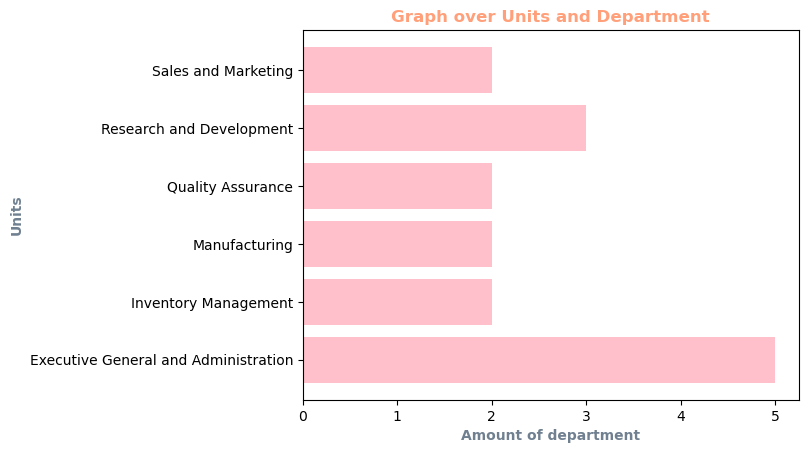

In [24]:
y=['Executive General and Administration', 'Inventory Management', 'Manufacturing', 'Quality Assurance',
   'Research and Development','Sales and Marketing' ]
 
# getting values against each value of y
x=[5,2,2,2,3,2] 

plt.barh(y, x, color= 'pink')
 
# setting label of y-axis
plt.ylabel("Units", fontweight= 'bold', color = 'slategrey')
 
# setting label of x-axis
plt.xlabel("Amount of department", fontweight='bold', color = 'slategrey') 
plt.title("Graph over Units and Department", fontweight='bold', color='lightsalmon')
plt.show()


In [25]:
# Here is a bar grapgh of the genders of employees
df = pd.read_sql(query_2_1, con=connection)
df

,Gender,Employees
0,F,84
1,M,206


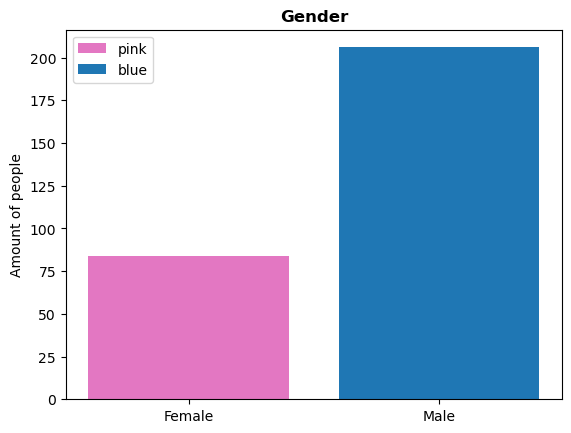

In [26]:
fig, ax = plt.subplots()

gender = ['Female', 'Male']
counts = [84, 206]
bar_labels = ['pink', 'blue']
bar_colors = ['tab:pink', 'tab:blue']

ax.bar(gender, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Amount of people')
ax.set_title('Gender', fontweight= 'bold')
ax.legend()

plt.show()

In [27]:
# I did bar stacked graph so we can cleraly see the status between the genders of employess
df = pd.read_sql(query_2_2, con=connection)
df

,Gender,Gender,MaritalStatus,MaritalStatus,TotalEmployees
0,F,Female,M,Married,49
1,F,Female,S,Single,35
2,M,Male,M,Married,97
3,M,Male,S,Single,109


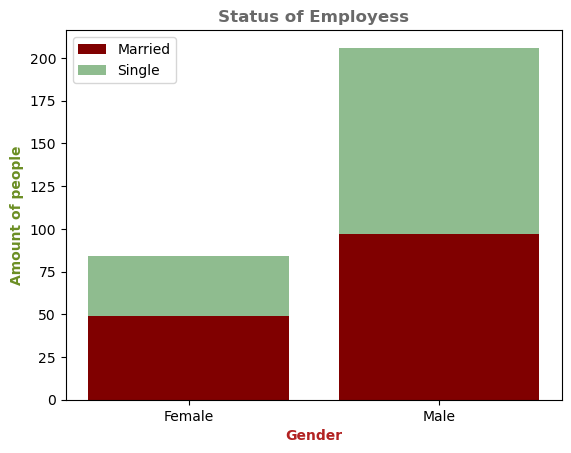

In [28]:
x = ['Female', 'Male']
y1 = [49, 97]
y2 = [35, 109]
 
plt.bar(x, y1, color='maroon')
plt.bar(x, y2, bottom=y1, color='darkseagreen')
plt.xlabel("Gender", color= 'firebrick', fontweight= 'bold')
plt.ylabel("Amount of people", color= 'olivedrab', fontweight= 'bold')
plt.title("Status of Employess", fontweight= 'bold', color='dimgrey')
plt.legend(['Married', 'Single']) 
plt.show()

In [29]:
# By calculating the number of each color, I did a pie chart that calculated the numbers to percentage
df = pd.read_sql(query_7_3, con=connection)
df

,Color,NumberProduct
0,Black,93
1,Blue,26
2,Grey,1
3,Multi,8
4,Red,38
5,Silver,43
6,Silver/Black,7
7,White,4
8,Yellow,36


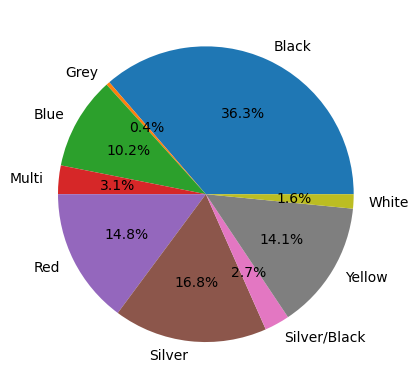

In [30]:
labels = 'Black','Grey', 'Blue', 'Multi', 'Red', 'Silver', 'Silver/Black','Yellow', 'White'
sizes = [93, 1, 26, 8, 38, 43, 7, 36, 4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [31]:
# Of this table we can see every sales person progress
# But I wanted to show by the grapgh of indivuals of progressing
# So I just set the same value of the light blue chart to everyone
# So that the purple chart can show the progress of increasing or decreasing
# The values of the grapgh are not real from the actual table 
df = pd.read_sql(query_8, con=connection)
df

,BusinessEntityID,SalesQuota,SalesYTD,SalesLastYear,Progress
0,274,NaN,5.596976e+05,0.000000e+00,Increased
1,275,300000.0,3.763178e+06,1.750406e+06,Increased
2,276,250000.0,4.251369e+06,1.439156e+06,Increased
3,277,250000.0,3.189418e+06,1.997186e+06,Increased
4,278,250000.0,1.453719e+06,1.620277e+06,Decreased
5,279,300000.0,2.315186e+06,1.849641e+06,Increased
6,280,250000.0,1.352577e+06,1.927059e+06,Decreased
7,281,250000.0,2.458536e+06,2.073506e+06,Increased
8,282,250000.0,2.604541e+06,2.038235e+06,Increased
9,283,250000.0,1.573013e+06,1.371635e+06,Increased


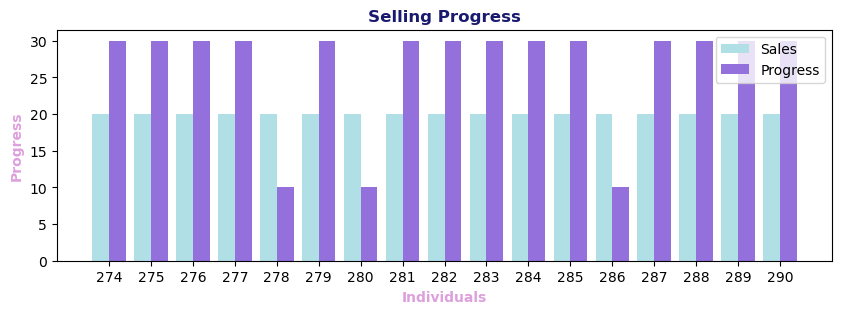

In [32]:
X = ['274','275','276','277','278', '279','280','281','282', '283', '284', '285', '286', '287', '288', '289', '290'] 
Sales = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20] 
Progress = [30, 30, 30, 30, 10, 30, 10, 30 , 30, 30, 30, 30, 10, 30, 30, 30, 30] 
  
fig = plt.figure(figsize = (10, 3))
X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, Sales, 0.4, label = 'Sales', color= 'powderblue') 
plt.bar(X_axis + 0.2, Progress, 0.4, label = 'Progress', color = 'mediumpurple') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Individuals", fontweight= 'bold', color = 'plum') 
plt.ylabel("Progress", fontweight= 'bold',  color = 'plum') 
plt.title("Selling Progress", fontweight= 'bold', color= 'midnightblue') 
plt.legend() 
plt.show() 

In [33]:
# This grapgh shows which year were most hired people and as we can see is 2009 and second is 2008
df = pd.read_sql(query_9_2, con=connection)
df

,Year,Amount hires that year
0,2006,1
1,2007,6
2,2008,74
3,2009,148
4,2010,38
5,2011,16
6,2012,4
7,2013,3


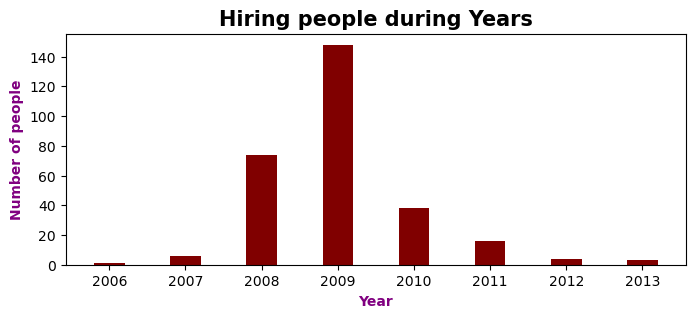

In [34]:
data = {'2006': 1, '2007': 6, '2008': 74, '2009': 148, '2010': 38, '2011': 16, '2012':4, '2013':3}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 3))
 
# creating the bar plot
plt.bar(year, values, color ='maroon', width = 0.4)
 
plt.xlabel("Year", fontsize = 10, color = 'purple',  fontweight = 'bold' )
plt.ylabel("Number of people", fontsize = 10, color = 'purple',  fontweight = 'bold')
plt.title("Hiring people during Years", color = 'black', fontweight = 'bold', fontsize = 15)
plt.show()

In [35]:
# This grapgh shows which month were most hired people and it's during the winter months december, januari and february
df = pd.read_sql(query_9_3, con=connection)
df

,Month,Hired in that month
0,1,85
1,2,78
2,3,26
3,4,1
4,5,14
5,6,1
6,9,1
7,11,1
8,12,83


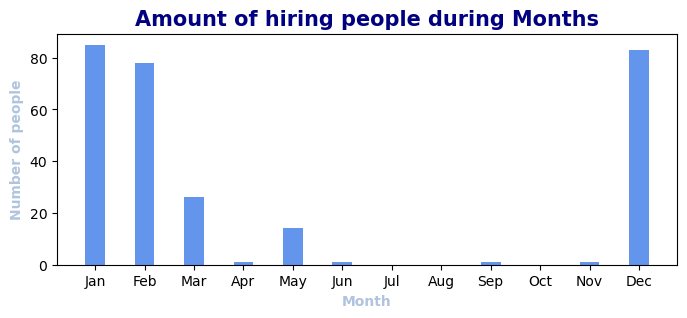

In [36]:
data = {'Jan': 85, 'Feb': 78, 'Mar': 26, 'Apr': 1, 'May': 14, 'Jun': 1, 'Jul':0, 'Aug':0,
       'Sep':1, 'Oct':0, 'Nov':1, 'Dec': 83}
month = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (8, 3))
 
# creating the bar plot
plt.bar(month, values, color ='cornflowerblue', width = 0.4)
 
plt.xlabel("Month", fontsize = 10, color = 'lightsteelblue',  fontweight = 'bold' )
plt.ylabel("Number of people", fontsize = 10, color = 'lightsteelblue',  fontweight = 'bold')
plt.title("Amount of hiring people during Months", color = 'navy', fontweight = 'bold', fontsize = 15)
plt.show()

In [37]:
df = pd.read_sql(query_12, con=connection)
df

,Average standard price,Average of minimum order QTY,Average of maximum order QTY
0,34.6765,145,776


In [38]:
# From the table Purchasing.ProductVendor I wanted to see if I could calculate the confidence interval
# Because as you can see I have already calculated the average of the standard price from my data query_12 above 
df = pd.read_sql(sql="SELECT * FROM Purchasing.ProductVendor", con=connection)
df.head()

,ProductID,BusinessEntityID,AverageLeadTime,StandardPrice,LastReceiptCost,LastReceiptDate,MinOrderQty,MaxOrderQty,OnOrderQty,UnitMeasureCode,ModifiedDate
0,1,1580,17,47.87,50.2635,2011-08-29,1,5,3.0,CS,2011-08-29
1,2,1688,19,39.92,41.9160,2011-08-29,1,5,3.0,CTN,2011-08-29
2,4,1650,17,54.31,57.0255,2011-08-29,1,5,NaN,CTN,2011-08-29
3,317,1578,19,28.17,29.5785,2011-08-29,100,1000,300.0,EA,2011-08-29
4,317,1678,17,25.77,27.0585,2011-08-25,100,1000,NaN,EA,2011-08-25


In [39]:
selling_price = df.StandardPrice

In [40]:
ci = stats.norm.interval(0.95, loc=np.mean(selling_price), scale=stats.sem(selling_price))

print(f"Confidence Interval for Average of Vendor's selling price: {ci}")

Confidence Interval for Average of Vendor's selling price: (33.44269460095867, 35.910392355563054)
